# **PROBLEM STATEMENT 3:**

## Multilingual Abusive Comment Detection: Given a comment, detect whether it is abusive or not

## **Load Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import time 
#for uploading data to csv
import re 
import string
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import re
import collections
from wordcloud import WordCloud

## **Load the Dataset**

In [ ]:
url='https://drive.google.com/file/d/1hKVwztucurF9Fw3UvzpWtU-13XoqSZlN/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url, error_bad_lines=False)
print(df.head())

b'Skipping line 51: expected 9 fields, saw 14\nSkipping line 254: expected 9 fields, saw 11\nSkipping line 923: expected 9 fields, saw 10\nSkipping line 1046: expected 9 fields, saw 11\nSkipping line 1420: expected 9 fields, saw 13\nSkipping line 1603: expected 9 fields, saw 10\nSkipping line 1729: expected 9 fields, saw 10\nSkipping line 1968: expected 9 fields, saw 10\nSkipping line 2618: expected 9 fields, saw 10\nSkipping line 2827: expected 9 fields, saw 10\nSkipping line 3459: expected 9 fields, saw 10\nSkipping line 3707: expected 9 fields, saw 10\nSkipping line 3935: expected 9 fields, saw 13\nSkipping line 4153: expected 9 fields, saw 13\nSkipping line 4676: expected 9 fields, saw 10\nSkipping line 4919: expected 9 fields, saw 10\nSkipping line 5626: expected 9 fields, saw 10\nSkipping line 6334: expected 9 fields, saw 15\nSkipping line 7326: expected 9 fields, saw 11\nSkipping line 7535: expected 9 fields, saw 15\nSkipping line 7789: expected 9 fields, saw 10\nSkipping line 7

   CommentId                 commentText  ... like_count_comment  like_count_post
0          0                     🤬🤬🤬🤬🤬🤬🤬  ...                0.0             40.0
1          1            चुड़ैल भूत प्रेत  ...                0.0            190.0
2          2      74537627501 randi kala  ...                0.0             99.0
3          3  சரி வர்சா ஐபீவா பேசனு உன்ட  ...                0.0             45.0
4          4        "gulabchandnainaihi"  ...                0.0            122.0

[5 rows x 9 columns]


In [ ]:
df

,CommentId,commentText,language,user_index,post_index,report_count_comment,report_count_post,like_count_comment,like_count_post
0,0,🤬🤬🤬🤬🤬🤬🤬,Assamese,154.0,113314.0,0.0,0.0,0.0,40.0
1,1,चुड़ैल भूत प्रेत,Rajasthani,3836.0,235816.0,0.0,1.0,0.0,190.0
2,2,74537627501 randi kala,Assamese,366.0,351524.0,0.0,0.0,0.0,99.0
3,3,சரி வர்சா ஐபீவா பேசனு உன்ட,Assamese,3046.0,789690.0,0.0,0.0,0.0,45.0
4,4,"""gulabchandnainaihi""",Rajasthani,4282.0,925495.0,0.0,0.0,0.0,122.0
...,...,...,...,...,...,...,...,...,...
126208,128333,4614608105 akshara,Kannada,69389.0,75803.0,0.0,3.0,2.0,312.0
126209,128334,💖💞🧡🥰,Kannada,52410.0,488044.0,0.0,1.0,0.0,325.0
126210,128335,party akka is my favorite 👑👑👑👑👑👑👑👑👑👑💍💍💍💍💍🥰😍🥰😘😘😘😘😘,Kannada,10426.0,629616.0,0.0,0.0,0.0,190.0
126211,128336,super. akk,Kannada,44019.0,964579.0,0.0,1.0,1.0,214.0


In [ ]:
test=df

In [ ]:
link = 'https://drive.google.com/file/d/1qrABwBtS-OeQz-RzWejYe18uUyG9Y1_7/view?usp=sharing' # The shareable link
id='1qrABwBtS-OeQz-RzWejYe18uUyG9Y1_7'
print (id) # Verify that you have everything after '='

1qrABwBtS-OeQz-RzWejYe18uUyG9Y1_7


In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('ShareChat-IndoML-Datathon-NSFW-CommentChallenge_Train.csv')  
df3 = pd.read_csv('ShareChat-IndoML-Datathon-NSFW-CommentChallenge_Train.csv',error_bad_lines=False)
# Dataset is now stored in a Pandas Dataframe

b'Skipping line 446: expected 10 fields, saw 13\nSkipping line 614: expected 10 fields, saw 11\nSkipping line 2576: expected 10 fields, saw 13\nSkipping line 2762: expected 10 fields, saw 18\nSkipping line 3384: expected 10 fields, saw 11\nSkipping line 3831: expected 10 fields, saw 11\nSkipping line 3892: expected 10 fields, saw 12\nSkipping line 4037: expected 10 fields, saw 11\nSkipping line 4042: expected 10 fields, saw 12\nSkipping line 4739: expected 10 fields, saw 16\nSkipping line 4846: expected 10 fields, saw 11\nSkipping line 5306: expected 10 fields, saw 11\nSkipping line 6271: expected 10 fields, saw 16\nSkipping line 7853: expected 10 fields, saw 11\nSkipping line 8970: expected 10 fields, saw 11\nSkipping line 9937: expected 10 fields, saw 16\nSkipping line 10511: expected 10 fields, saw 13\nSkipping line 11199: expected 10 fields, saw 11\nSkipping line 11455: expected 10 fields, saw 11\nSkipping line 11711: expected 10 fields, saw 11\nSkipping line 11785: expected 10 fie

In [ ]:
train=df3
train

,CommentId,commentText,language,user_index,post_index,report_count_comment,report_count_post,like_count_comment,like_count_post,label
0,0,randi ka deewana,Assamese,2869,175913,0,1,0,65,1.0
1,1,👌👌🙏🥰🥰🥰☝️☝️,Rajasthani,601,960582,0,0,1,94,0.0
2,2,apni pant utar kar apni chut bhi to bata do ma...,Urdu,1205,17327,0,1,0,731,1.0
3,3,krishnatripathi4578 jesi ghar ki sabhyata vais...,Rajasthani,889,352919,0,1,1,285,0.0
4,4,is randi ko dusra kaam nahi hai kuttiya kahin ki,Urdu,372,261223,0,0,0,453,1.0
...,...,...,...,...,...,...,...,...,...,...
1483501,1500893,pavam🤣 😁😻😻😻😻,Malayalam,7201,661099,0,0,1,28,0.0
1483502,1500894,enik ind post ittittila 😔,Malayalam,16000,905283,0,0,2,28,0.0
1483503,1500895,nirmelp34 parayilla,Malayalam,10028,339564,0,0,0,28,0.0
1483504,1500896,ettan🙈😘,Malayalam,5552,397363,0,0,2,28,0.0


In [ ]:
df=train

## **Create a Balanced Dataset**

In [ ]:
# Remove the unnecessary columns
df = df[['commentText','label']]
df.head()

,commentText,label
0,randi ka deewana,1.0
1,👌👌🙏🥰🥰🥰☝️☝️,0.0
2,apni pant utar kar apni chut bhi to bata do ma...,1.0
3,krishnatripathi4578 jesi ghar ki sabhyata vais...,0.0
4,is randi ko dusra kaam nahi hai kuttiya kahin ki,1.0


In [ ]:
df_pos = df.loc[df.label == 1]
df_neg = df.loc[df.label == 0]
print('Postive examples: {}  Negative examples: {}'.format(len(df_pos),len(df_neg)))

Postive examples: 347390  Negative examples: 1135897


In [ ]:
def create_small_dataset(df_pos, df_neg, n_samples):
    """ Create a custom dataset of size `n_samples` from positive `df_pos` and negative `df-neg`
        examples.
    """
    duplicates = set()
    counter = 0
    data = {}
    data['commentText'] = []
    data['label'] = []
    while counter < n_samples:
        index = np.random.randint(0, len(df_pos))
        if index in duplicates:
            continue
        row = df_pos.iloc[index]
        comment = remove_emoji(row['commentText'])
        label = row['label']
        data['commentText'].append(comment)
        data['label'].append(label)
        duplicates.add(index)
        counter += 1

    duplicates.clear()
    counter = 0
    while counter < n_samples:
        index = np.random.randint(0, len(df_neg))
        if index in duplicates:
            continue
        row = df_neg.iloc[index]
        comment = remove_emoji(row['commentText'])
        label = row['label']
        data['commentText'].append(comment)
        data['label'].append(label)
        duplicates.add(index)
        counter += 1
    return pd.DataFrame.from_dict(data)

def remove_emoji(text):
    """ Remove a number of emojis from text."""
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    text = re.sub(emoji_pattern, ' ', text).replace('.','')
    return re.sub(r'[a-z]+[A-Z]+', '', text, re.I)



In [ ]:
dataset_size = 5000
dataset = create_small_dataset(df_pos, df_neg, dataset_size)

#shuffle the dataset
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset

,commentText,label
0,nice pic,0.0
1,tere man baap dekhenge to kya samjhenge kutiya...,0.0
2,☺️☺️🤗🤗,0.0
3,मेरे पास फालतू logo से bakwas karne ke liye ti...,1.0
4,o my gand,1.0
...,...,...
9995,hio jn,0.0
9996,sali to hogi uski bhi par dadi,1.0
9997,🤣🤣🤣🤣🤣അടിപൊളി,0.0
9998,ye ladki mujhe chutiya lagti h lo,1.0


In [ ]:
train_data, test_data = train_test_split(dataset, test_size=0.2)
print('train data size: {}    test data size: {}'.format(len(train_data), len(test_data)))

train data size: 8000    test data size: 2000


## **Convert the Data into Bert Specific Format**

In [ ]:
from transformers import glue_convert_examples_to_features, InputExample
def convert_data_into_input_example(data):
    """ Covert the list of examples into a list of `InputExample` objects that is suitable
        for BERT model."""
    input_examples = []
    for i in range(len(data)):
        example = InputExample(
            guid= None,
            text_a= data.iloc[i]['commentText'],
            text_b= None,
            label= data.iloc[i]['label']
        )
        input_examples.append(example)
    return input_examples

In [ ]:
train_input_examples = convert_data_into_input_example(train_data)
val_input_examples = convert_data_into_input_example(test_data)

# **Tokenization**

In [ ]:
from transformers import BertTokenizer, TFBertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)

text = 'I liked that book very much!'
tokenized_text = tokenizer.tokenize(text)
print(tokenized_text)
text_ids = tokenizer.convert_tokens_to_ids(tokenized_text)
print('text ids:', text_ids)
text_ids_with_special_tokens = tokenizer.build_inputs_with_special_tokens(text_ids)
print('text ids with special tokens: ', text_ids_with_special_tokens)

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.87M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

['I', 'like', '##d', 'that', 'book', 'very', 'much', '!']
text ids: [146, 11850, 10162, 10189, 12748, 12558, 13172, 106]
text ids with special tokens:  [101, 146, 11850, 10162, 10189, 12748, 12558, 13172, 106, 102]


In [ ]:
MAX_SEQ_LENGTH = 128
encoded_bert_text = tokenizer.encode(text, add_special_tokens=True, max_length=MAX_SEQ_LENGTH)
# encoded_bert_text = tokenizer.encode(text, add_special_tokens=True, max_length=MAX_SEQ_LENGTH, return_tensors='tf')

print('encoded text: ', encoded_bert_text)
decoded_text_with_special_token = tokenizer.decode(encoded_bert_text)
decoded_text_without_special_token = tokenizer.decode(encoded_bert_text, skip_special_tokens=True)

print('decoded text with special token: ', decoded_text_with_special_token)
print('decoded text without special token: ', decoded_text_without_special_token)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


encoded text:  [101, 146, 11850, 10162, 10189, 12748, 12558, 13172, 106, 102]
decoded text with special token:  [CLS] I liked that book very much! [SEP]
decoded text without special token:  I liked that book very much!


In [ ]:
label_list = [0,1]

bert_train_dataset = glue_convert_examples_to_features(examples=train_input_examples, tokenizer=tokenizer, max_length=MAX_SEQ_LENGTH, task='mrpc', label_list=label_list)
bert_val_dataset = glue_convert_examples_to_features(examples=val_input_examples, tokenizer=tokenizer, max_length=MAX_SEQ_LENGTH, task='mrpc', label_list=label_list)

for i in range(3):
#     print('Example: {}'.format(bert_train_dataset[i]))
    print('Example: {')
    print(' Input_ids: {}'.format(bert_train_dataset[i].input_ids))
    print(' attention_mask: {}'.format(bert_train_dataset[i].attention_mask))
    print(' token_type_ids: {}'.format(bert_train_dataset[i].token_type_ids))
    print(' label: {}'.format(bert_train_dataset[i].label))
    print('}')

/usr/local/lib/python3.7/dist-packages/transformers/data/processors/glue.py:67: FutureWarning: This function will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/master/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("function"), FutureWarning)
/usr/local/lib/python3.7/dist-packages/transformers/data/processors/glue.py:175: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/master/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


Example: {
 Input_ids: [101, 100, 100, 100, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 attention_mask: [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 token_type_ids: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
ex = bert_train_dataset[0]
in_ids = ex.input_ids
decoded_sentence = tokenizer.decode(in_ids, skip_special_tokens=True)
print(decoded_sentence)

# **Defining the Hyperparameters**

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BasicTokenizer
from transformers import TFBertModel, TFBertPreTrainedModel, TFBertForSequenceClassification
from transformers import glue_convert_examples_to_features, InputExample
model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased')

optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08, clipnorm=1.0)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

Downloading:   0%|          | 0.00/1.01G [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def my_solution(bdset):
    """ Create a list of input tensors required to be in the first argument of the
        model call function for training. e.g. `model([input_ids, attention_mask, token_type_ids])`.
    """
    input_ids, attention_mask, token_type_ids, label = [], [], [], []
    for in_ex in bdset:
        input_ids.append(in_ex.input_ids)
        attention_mask.append(in_ex.attention_mask)
        token_type_ids.append(in_ex.token_type_ids)
        label.append(in_ex.label)

    input_ids = np.vstack(input_ids)
    attention_mask = np.vstack(attention_mask)
    token_type_ids = np.vstack(token_type_ids)
    label = np.vstack(label)
    return ([input_ids, attention_mask, token_type_ids], label)

def example_to_features(input_ids, attention_masks, token_type_ids, y):
    """ Convert a training example into the Bert compatible format."""
    return {"input_ids": input_ids,
            "attention_mask": attention_masks,
            "token_type_ids": token_type_ids},y


## **Training the Model**

In [ ]:
x_train, y_train = my_solution(bert_train_dataset)
x_val, y_val = my_solution(bert_val_dataset)

print('x_train shape: {}'.format(x_train[0].shape))
print('x_val shape: {}'.format(x_val[0].shape))

train_ds = tf.data.Dataset.from_tensor_slices((x_train[0], x_train[1], x_train[2], y_train)).map(example_to_features).shuffle(100).batch(32)
val_ds   = tf.data.Dataset.from_tensor_slices((x_val[0], x_val[1], x_val[2], y_val)).map(example_to_features).batch(64)

print('Format of model input examples: {} '.format(train_ds.take(1)))

EPOCHS = 3

history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)

x_train shape: (8000, 128)
x_val shape: (2000, 128)
Format of model input examples: <TakeDataset shapes: ({input_ids: (None, 128), attention_mask: (None, 128), token_type_ids: (None, 128)}, (None, 1)), types: ({input_ids: tf.int64, attention_mask: tf.int64, token_type_ids: tf.int64}, tf.int64)> 
Epoch 1/3
250/250 [==============================] - 10882s 43s/step - loss: 0.4666 - accuracy: 0.7791 - val_loss: 0.3466 - val_accuracy: 0.8465
Epoch 2/3
250/250 [==============================] - 10869s 43s/step - loss: 0.3151 - accuracy: 0.8702 - val_loss: 0.3691 - val_accuracy: 0.8540
Epoch 3/3
250/250 [==============================] - 10804s 43s/step - loss: 0.2162 - accuracy: 0.9194 - val_loss: 0.3762 - val_accuracy: 0.8660


NameError: ignored

# **Plot the Loss and Accuracy**

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

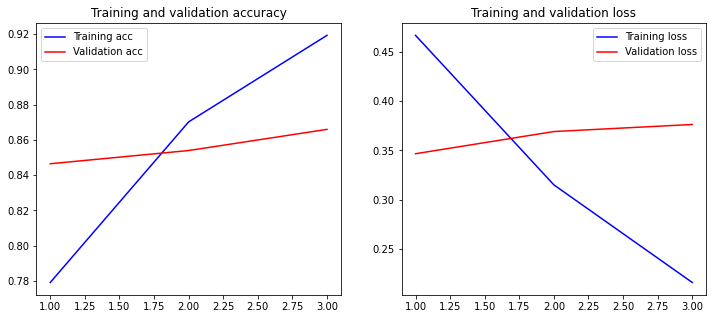

In [ ]:
plot_history(history)

# **Prediction and Evaluation**

In [ ]:
predictions = model.predict(val_ds)
print(predictions[0].shape)
print()
predictions_classes = np.argmax(predictions[0], axis = 1)


(2000, 2)



In [ ]:
for i in range(10):
    print('comment: {}\n, actual label: {}, predicted label: {}'.format(test_data.iloc[i]['commentText'], val_input_examples[i].label, predictions_classes[i]))

comment: bp film hogi
, actual label: 1.0, predicted label: 0
comment: manojkumar33449992gmailcom
, actual label: 0.0, predicted label: 0
comment: eshanbhai855  sali randi
, actual label: 1.0, predicted label: 1
comment: हम सोच रहे हैं आपके बारे में
, actual label: 1.0, predicted label: 0
comment: good evening ji  
, actual label: 0.0, predicted label: 0
comment: বালের সিঙ্গেল লাইফ
, actual label: 1.0, predicted label: 1
comment: har har mahadev  
, actual label: 0.0, predicted label: 0
comment: एक बात बतादे तेरी गांड़  इट नी बड़ी कैसे हो जाती है हर वीडियो में
, actual label: 1.0, predicted label: 1
comment: ✬⁎⁑ vanshi bad innocent ⁎⁑✬ ना मैडम हम लोग तो आज भी पानी को मम और बाथरूम को सुसु कहते हैं हमें इतनी समझ कहां कि हम लोग लाइन हमारे
, actual label: 1.0, predicted label: 1
comment: chutiya bnata h sal66i there
, actual label: 1.0, predicted label: 1


In [ ]:
def example_to_features_predict(input_ids, attention_masks, token_type_ids):
    """
        Convert the test examples into Bert compatible format.
    """
    return {"input_ids": input_ids,
            "attention_mask": attention_masks,
            "token_type_ids": token_type_ids}


def get_prediction(in_sentences):
    """
        Prepare the test comments and return the predictions.
    """
    labels = [0,1]
    input_examples = [InputExample(guid="", text_a = x, text_b = None, label = 0) for x in in_sentences] # here, "" is just a dummy label
    predict_input_fn = glue_convert_examples_to_features(examples=input_examples, tokenizer=tokenizer, max_length=MAX_SEQ_LENGTH, task='mrpc', label_list=label_list)
    x_test_input, y_test_input = my_solution(predict_input_fn)
    test_ds   = tf.data.Dataset.from_tensor_slices((x_test_input[0], x_test_input[1], x_test_input[2])).map(example_to_features_predict).batch(32)

    predictions = model.predict(test_ds)
    #   print('predictions:', predictions[0].shape)
    predictions_classes = np.argmax(predictions[0], axis = 1)
    return [(sentence, prediction) for sentence, prediction in zip(in_sentences, predictions_classes)]


In [ ]:
pred_sentences = [comment for comment,l in test_data.sample(20).values]
predictions = get_prediction(pred_sentences)
for p in predictions:
    print(p)

/usr/local/lib/python3.7/dist-packages/transformers/data/processors/glue.py:67: FutureWarning: This function will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/master/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("function"), FutureWarning)
/usr/local/lib/python3.7/dist-packages/transformers/data/processors/glue.py:175: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/master/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


('മനോഹരമായി   ', 0)
('sher my new vi  deo didi please', 0)
('kafi mil rahi ho behne lgti ho', 1)
('bahoot khub bhosdi ke lageraho', 1)
('tora bur bura land ka pani dega', 1)
('mine duker girl  ', 0)
('jannat or kutte को भी bhav na do न फिर भी मुह utha के chale आते h', 1)
('myvoice enne follow cheythal thirichum cheyyam', 0)
('ek ladki ke chalte bahan chod tum apne ghar wale ko barbad kar rahi ho', 1)
('🤝 ', 0)
('thevidia than antha ponnu ivan pavam', 1)
('madarchod meri bahan hai vah  ', 1)
('randi sali kutiya tamij name ke koi bat nahi hai', 1)
('alagar', 0)
('hogo pura', 0)
('randi kitiya sali', 1)
('ਭੈਣ ਚੋਦਾ ਹੋਰ ਕੰਮ ਨੀ ਕੋੲੀ ਤੈਨੂ', 1)
('radi', 0)
('iska matlab ye 16 bar chud chuki he', 1)
('rajesh rao  in bhai bhn ko koi kaam to h nhi desh k bhole jntana ko bevkuf bnane k alawa🤷🤷 or inki mata ji inki master mind h iss kaam m 🤦🤦🤦', 1)


In [ ]:
print("Evaluating the BERT model")
model.evaluate(val_ds)

Evaluating the BERT model
32/32 [==============================] - 746s 23s/step - loss: 0.3762 - accuracy: 0.8660


[0.37623628973960876, 0.8659999966621399]